## House Prices: A regression Problem for prediction of House SalesPrice



In [2]:
import numpy as np
import pandas as pd
import glob
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline

In [3]:
train  = pd.read_csv('train.csv',index_col=0)

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 80)

In [6]:
test = pd.read_csv('test.csv',index_col=0)

In [7]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
test.shape

(1459, 79)

In [9]:
train.get_dtype_counts()

float64     3
int64      34
object     43
dtype: int64

In [10]:
train.isnull().T.any().T.sum()

1460

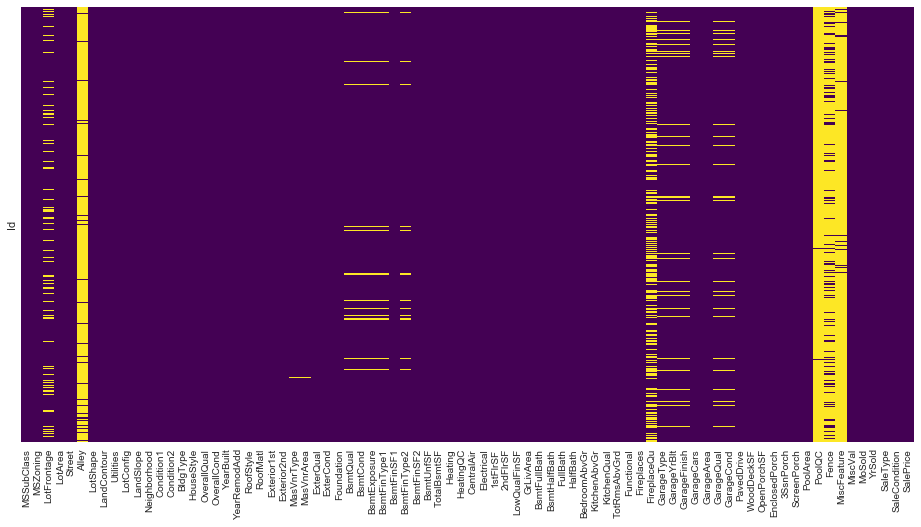

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

## FirePlaceQc: Ordinal  (NA  = No fire place) can be imputed to 0

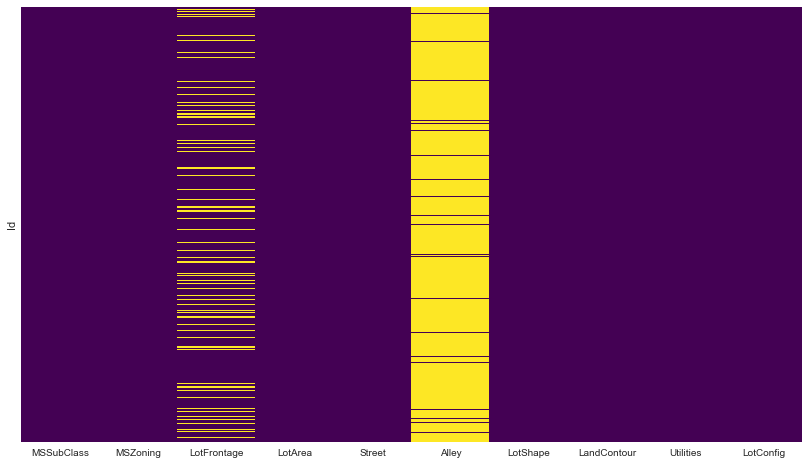

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(train.iloc[1:,:10].isnull(),cmap='viridis',cbar=False,yticklabels=False)

## LotFrontage -> can droped
## Alley(NA = not gravel, not pavel) but can be droped

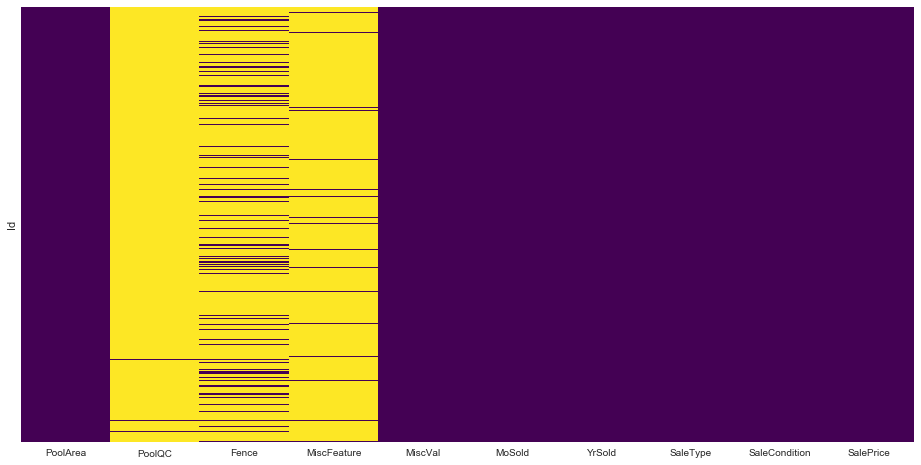

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(train.iloc[:,70:].isnull(),cmap='viridis',cbar=False,yticklabels=False)

## PoolQC (NA = No pool):Ordinal
## Fence (NA =  no fence):Ordinal
## MiscFeature(NA no = no other features)  -> this can be droped
 

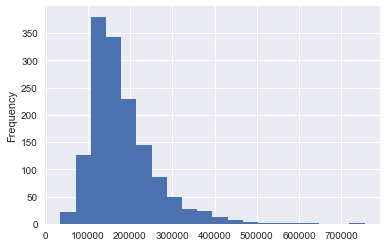

In [15]:
train.SalePrice.plot(kind = 'hist',bins = 20)

## SalePrice does not have a normal distribution

(array([   4.,    1.,    0.,    5.,    7.,    6.,   26.,   45.,   47.,
         114.,  165.,  215.,  172.,  199.,  119.,  109.,   88.,   52.,
          35.,   26.,   12.,    5.,    4.,    2.,    2.]),
 array([ 10.46024211,  10.58321134,  10.70618058,  10.82914982,
         10.95211906,  11.07508829,  11.19805753,  11.32102677,
         11.443996  ,  11.56696524,  11.68993448,  11.81290371,
         11.93587295,  12.05884219,  12.18181142,  12.30478066,
         12.4277499 ,  12.55071913,  12.67368837,  12.79665761,
         12.91962684,  13.04259608,  13.16556532,  13.28853455,
         13.41150379,  13.53447303]),
 <a list of 25 Patch objects>)

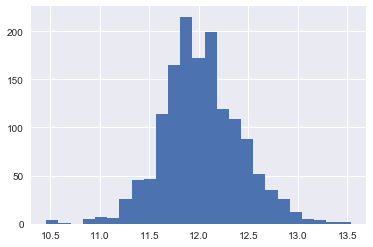

In [16]:
plt.hist(np.log(train.SalePrice),bins=25)

# log(SalePrice) has a normal distribution, my be we can take our target variable the log(SalePrice)

In [21]:
train['logSalePrice'] = np.log(train.SalePrice)

# Some Categorical Variables

In [17]:
train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

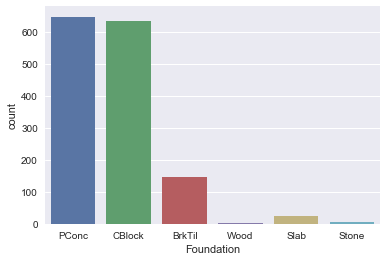

In [18]:
sns.countplot(train.Foundation)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

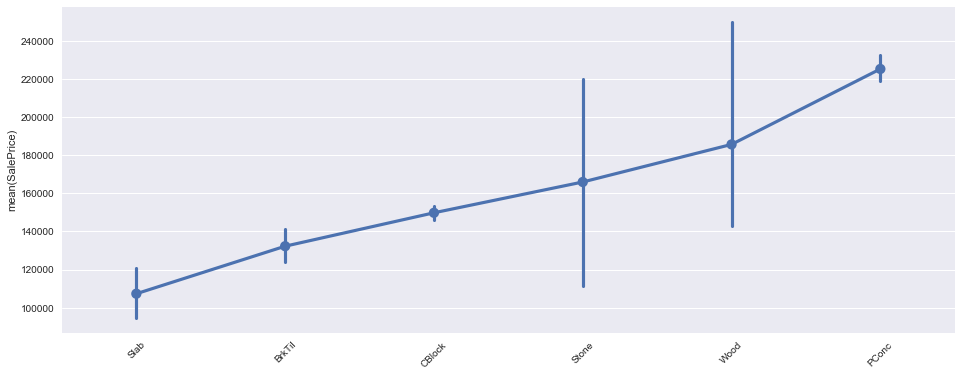

In [23]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.Foundation.values, y = train.SalePrice,
               order = train.groupby('Foundation')['SalePrice'].mean().sort_values().index)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

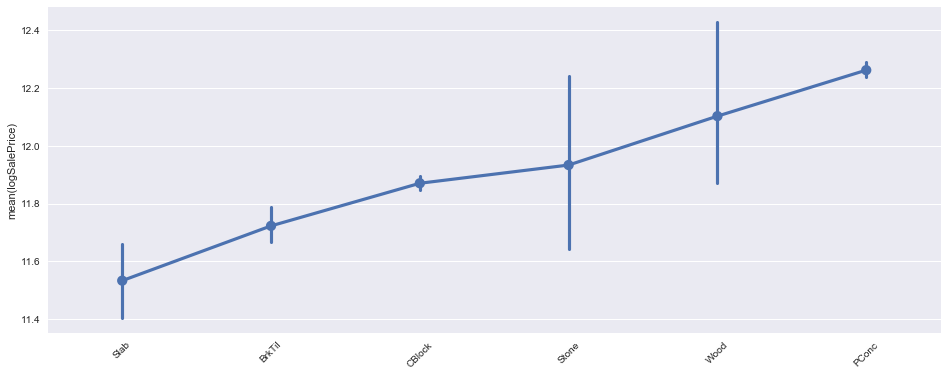

In [24]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.Foundation.values, y = train.logSalePrice,
               order = train.groupby('Foundation')['logSalePrice'].mean().sort_values().index)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

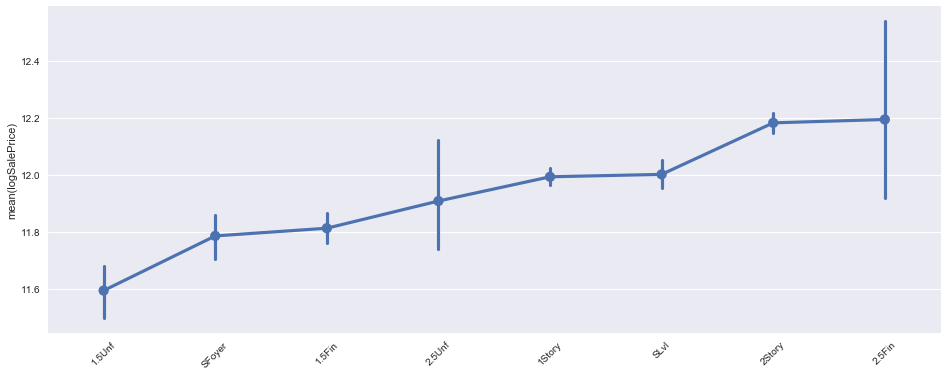

In [43]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.HouseStyle.values, y = train.logSalePrice,
               order = train.groupby('HouseStyle')['logSalePrice'].mean().sort_values().index)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

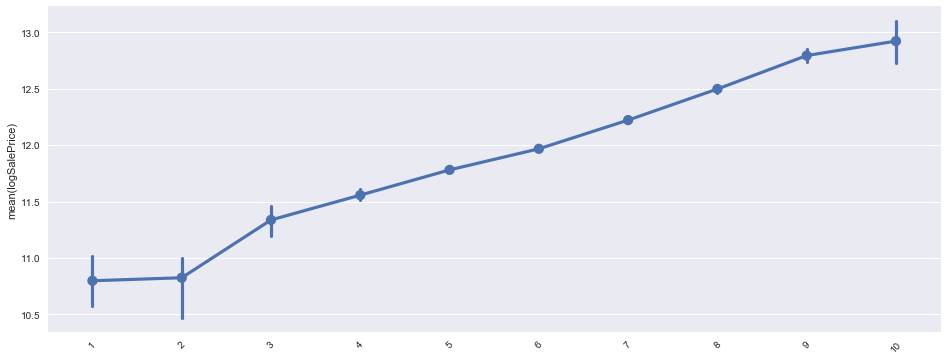

In [41]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.OverallQual.values, y = train.logSalePrice,
               order = train.groupby('OverallQual')['logSalePrice'].mean().sort_values().index)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

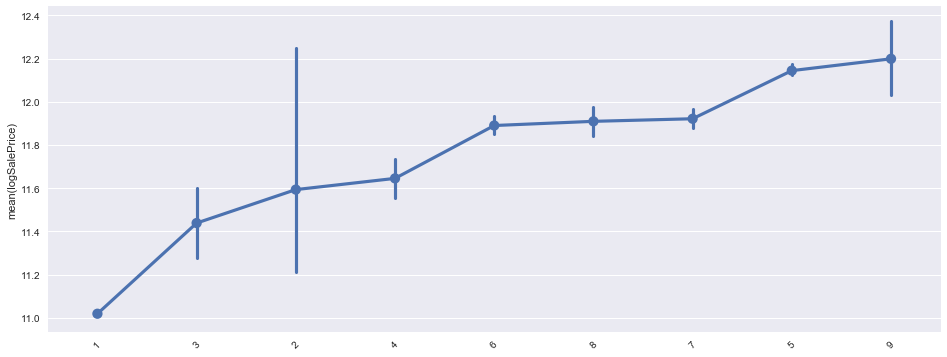

In [42]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.OverallCond.values, y = train.logSalePrice,
               order = train.groupby('OverallCond')['logSalePrice'].mean().sort_values().index)
plt.xticks(rotation = 45) 

# Some Numerical Fetures

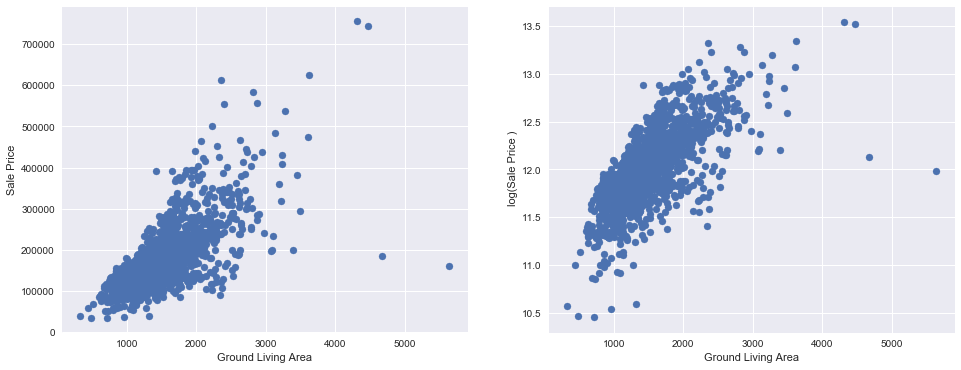

In [25]:
fig, axes = plt.subplots(1, 2,figsize=(16,6))
axes[0].scatter(train.GrLivArea, train.SalePrice)
axes[0].set_xlabel("Ground Living Area")
axes[0].set_ylabel("Sale Price")
axes[1].scatter(train.GrLivArea, train.logSalePrice)
axes[1].set_xlabel("Ground Living Area")
axes[1].set_ylabel(" log(Sale Price )")

## Seems there are two outliers: the last two points in the above scatter plots & their indeces are : [524, 1299]


In [26]:
train[train.GrLivArea > 4500]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,12.126759
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,11.982929


In [27]:
index_to_drop_later = train[train.GrLivArea > 4500].index.tolist()

In [28]:
index_to_drop_later

[524, 1299]

In [28]:
#train.Neighborhood, train.SalePrice

In [30]:
train[['Neighborhood','logSalePrice']].sort_values('Neighborhood').head()

,Neighborhood,logSalePrice
Id,,
852,Blmngtn,12.278393
466,Blmngtn,12.093688
791,Blmngtn,11.984178
1020,Blmngtn,12.271345
640,Blmngtn,12.485827


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

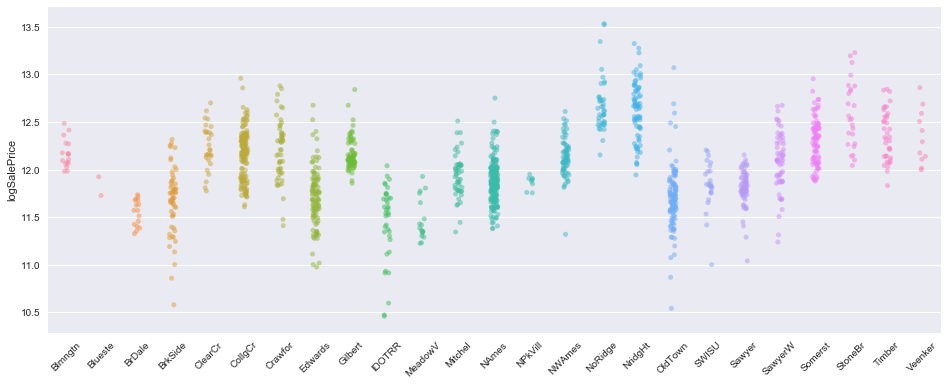

In [31]:
plt.figure(figsize=(16,6))
sns.stripplot(x = train.Neighborhood.values, y = train.logSalePrice, order= np.sort(train.Neighborhood.unique()),
              jitter= 0.1 , alpha = 0.5)
plt.xticks(rotation = 45)

# but here it is difficult to compare as some Neighbourhood has many data points

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

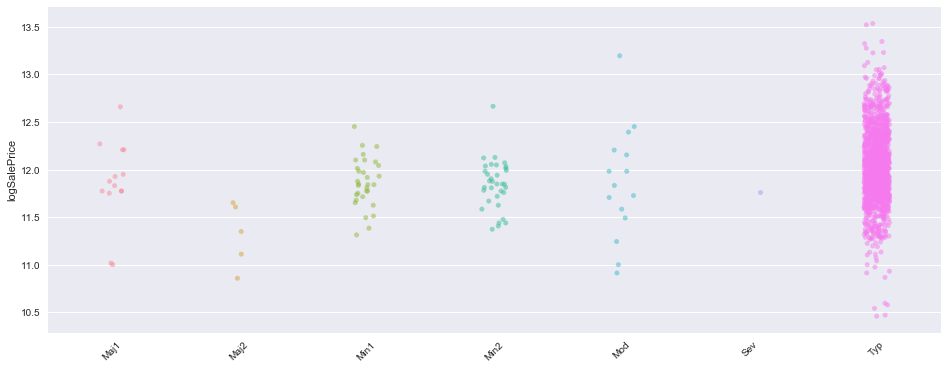

In [32]:
plt.figure(figsize=(16,6))
sns.stripplot(x = train.Functional.values, y = train.logSalePrice, order= np.sort(train.Functional.unique()),
              jitter= 0.1 , alpha = 0.5)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

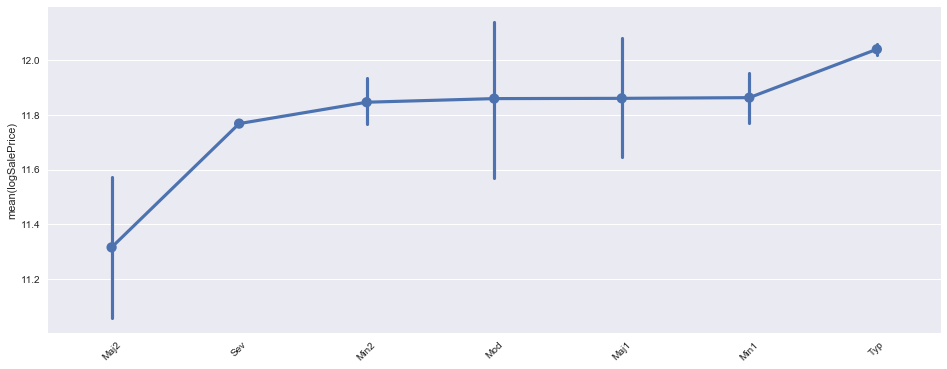

In [34]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.Functional.values, y = train.logSalePrice,
               order = train.groupby('Functional')['logSalePrice'].mean().sort_values().index)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

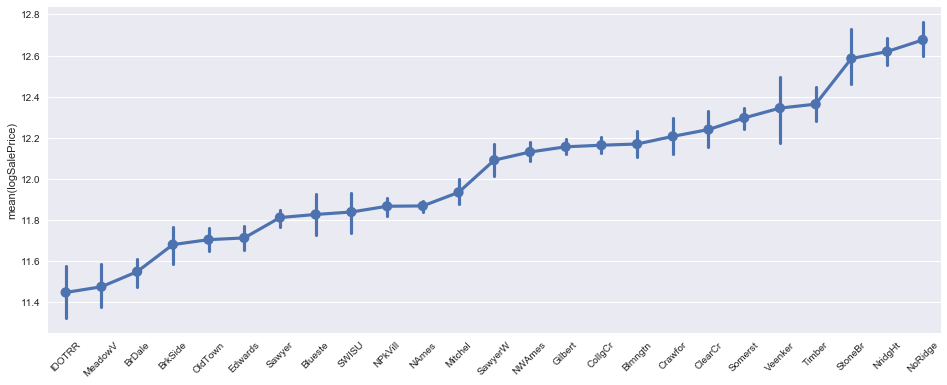

In [33]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.Neighborhood.values, y = train.logSalePrice,
               order = train.groupby('Neighborhood')['logSalePrice'].mean().sort_values().index)
plt.xticks(rotation = 45)

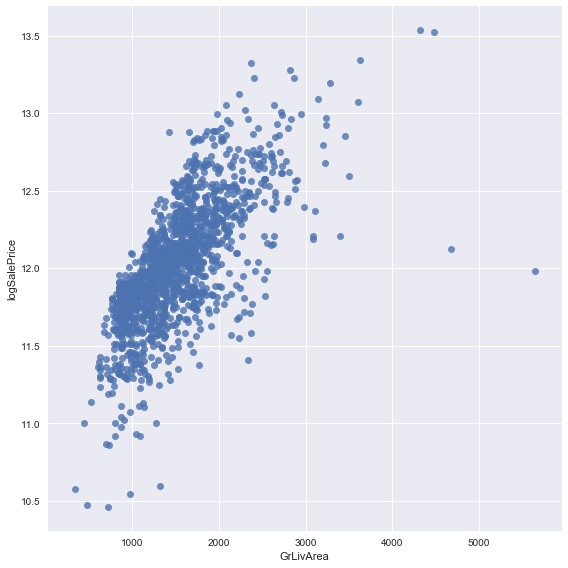

In [35]:
sns.lmplot("GrLivArea", "logSalePrice",data=train,fit_reg=False,palette="Set1",size=8)

# NoW let's Extrct the features and preprocess them:

In [44]:
train.shape

(1460, 81)

In [45]:
train.dtypes.value_counts()

object     43
int64      34
float64     4
dtype: int64

In [54]:
# High number of missing value cols
cols_to_drop = ['LotFrontage','Alley','MiscFeature']

In [55]:
categorical_feats = train.select_dtypes(include=["object"]).columns.tolist()
categorical_feats = list(set(categorical_feats) - set(cols_to_drop))
len(categorical_feats)

41

In [56]:
numerical_feats =  train.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_feats =  list(set(numerical_feats) - set(cols_to_drop))
len(numerical_feats)

37

In [58]:
len(numerical_feats) + len(categorical_feats) # 77 + one added logSalePrice

78

In [59]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


In [60]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [61]:
data_all = pd.concat([train,test],axis=0)

In [62]:
data_all.shape

(2919, 81)

In [63]:
data_all.drop(cols_to_drop,axis=1,inplace=True)

In [64]:
data_all.shape

(2919, 78)

In [65]:
data_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,logSalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,12.247694
2,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,12.109011
3,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,12.317167
4,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,11.849398
5,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,12.429216


In [66]:
data_all.SalePrice.isnull().sum(), test.shape[0]

(1459, 1459)

In [68]:
data_all.isnull().sum().sum()

10862

## Handling Categorical Features

In [69]:
cols_to_drop

['LotFrontage', 'Alley', 'MiscFeature']

In [70]:
# to be coded
ordinal_feats = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 
                'ExterCond','ExterQual','Fence','FireplaceQu','GarageCond',
                'GarageQual','HeatingQC','KitchenQual','PoolQC']

In [71]:
len(ordinal_feats)

14

In [72]:
# to be changed to dummies
nominal_feats  = ['BldgType','CentralAir','Condition1','Condition2','Exterior1st','Electrical', 
                   'Exterior2nd','Foundation','Functional','GarageFinish','GarageType','Heating',
                   'LandContour','LandSlope', 'LotConfig','LotShape','MSZoning','MasVnrType','Neighborhood',
                   'PavedDrive','RoofMatl','RoofStyle','SaleCondition','SaleType','Street','HouseStyle','Utilities']

In [73]:
len(nominal_feats)

27

In [74]:
len(nominal_feats) + len(ordinal_feats), len(categorical_feats) # true cus one is Numerical

(41, 41)

In [75]:
len(numerical_feats)

37

In [76]:
len(numerical_feats) + len(nominal_feats) + len(ordinal_feats)

78

In [82]:
df_numerical = data_all[numerical_feats]
df_nominal   = data_all[nominal_feats]
df_ordinal   = data_all[ordinal_feats]

In [83]:
print('Numercal', df_numerical.shape)
print('Nomical',  df_nominal.shape)
print('Ordinal', df_ordinal.shape)
print('All_data', data_all.shape)

Numercal (2919, 37)
Nomical (2919, 27)
Ordinal (2919, 14)
All_data (2919, 78)


## Handling Ordinla Features

In [84]:
ordinal_feats

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'PoolQC']

In [85]:
#Basment
df_ordinal.BsmtCond     = df_ordinal.BsmtCond.replace({'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd' : 4 , 'Ex' : 5}).fillna(0)
df_ordinal.BsmtExposure = df_ordinal.BsmtExposure.replace({'No': 1, 'Mn': 2, 'Av' : 3, 'Gd' : 4}).fillna(0)
df_ordinal.BsmtFinType1 = df_ordinal.BsmtFinType1.replace({'Unf': 1, 'LwQ': 2 ,'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ': 6}).fillna(0)
df_ordinal.BsmtFinType2 = df_ordinal.BsmtFinType2.replace({'Unf': 1, 'LwQ': 2 ,'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ': 6}).fillna(0)
df_ordinal.BsmtQual     = df_ordinal.BsmtQual.replace({'Fa': 1, 'TA' : 2, 'Gd' : 3 , 'Ex' : 4}).fillna(0)

#External
df_ordinal.ExterCond    = df_ordinal.ExterCond.replace({'Po': 1, 'Fa': 2 ,'TA': 3, 'Gd': 4, 'Ex':5 }).fillna(0)
df_ordinal.ExterQual    = df_ordinal.ExterQual.replace({'Po': 1, 'Fa': 2 ,'TA': 3, 'Gd': 4, 'Ex':5 }).fillna(0) 

#Fire & Fence
df_ordinal.FireplaceQu  = df_ordinal.FireplaceQu.replace({'Po': 1, 'Fa': 2 ,'TA': 3, 'Gd': 4, 'Ex':5 }).fillna(0)
df_ordinal.Fence        = df_ordinal.Fence.replace({'MnWw': 1, 'GdWo': 2, 'MnPrv' : 3, 'GdPrv': 4}).fillna(0)
#Heating
df_ordinal.HeatingQC    = df_ordinal.HeatingQC.replace({'Po': 1, 'Fa': 2 ,'TA': 3, 'Gd': 4, 'Ex':5 }).fillna(0)
#Garage Condition
df_ordinal.GarageCond   = df_ordinal.GarageCond.replace({'Po': 1, 'Fa': 2 ,'TA': 3, 'Gd': 4, 'Ex': 5 }).fillna(0)
df_ordinal.GarageQual   = df_ordinal.GarageQual.replace({'Po': 1, 'Fa': 2 ,'TA': 3, 'Gd': 4, 'Ex': 5 }).fillna(0)
#Kitchen
df_ordinal.KitchenQual  = df_ordinal.KitchenQual.replace({'Po': 1, 'Fa': 2 ,'TA': 3, 'Gd': 4, 'Ex': 5 }).fillna(0)
#Pool
df_ordinal.PoolQC       = df_ordinal.PoolQC.replace({'Fa': 1, 'TA': 2 ,'Gd': 3, 'Ex': 4}).fillna(0)

C:\Users\gebabe\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [86]:
df_ordinal.isnull().sum() # perfect

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
ExterCond       0
ExterQual       0
Fence           0
FireplaceQu     0
GarageCond      0
GarageQual      0
HeatingQC       0
KitchenQual     0
PoolQC          0
dtype: int64

In [87]:
df_ordinal.dtypes

BsmtQual        float64
BsmtCond        float64
BsmtExposure    float64
BsmtFinType1    float64
BsmtFinType2    float64
ExterCond         int64
ExterQual         int64
Fence           float64
FireplaceQu     float64
GarageCond      float64
GarageQual      float64
HeatingQC         int64
KitchenQual     float64
PoolQC          float64
dtype: object

## Nominal Features

In [88]:
df_nominal.shape

(2919, 27)

In [89]:
nominal_feats

['BldgType',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Exterior1st',
 'Electrical',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageFinish',
 'GarageType',
 'Heating',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'HouseStyle',
 'Utilities']

In [91]:
df_nominal.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'], dtype=object)

## Attension !!
** nan above means no garage not a missing value, this means it has an actul meaning,  
so lets fill all nan by something, for example UK = uknown which actually has a meaning **

In [92]:
df_nominal = df_nominal.fillna('UK')

In [93]:
df_nominal = pd.get_dummies(df_nominal,drop_first=True)

In [94]:
df_nominal.isnull().sum().sum() # perfect

0

# Numerical Features

In [95]:
df_numerical.shape

(2919, 37)

In [96]:
df_numerical.isnull().sum()

OverallQual         0
MSSubClass          0
LowQualFinSF        0
BsmtFinSF2          1
logSalePrice     1459
MasVnrArea         23
2ndFlrSF            0
EnclosedPorch       0
BsmtFullBath        2
TotalBsmtSF         1
GrLivArea           0
GarageCars          1
YearBuilt           0
YearRemodAdd        0
Fireplaces          0
GarageArea          1
MoSold              0
LotArea             0
BsmtUnfSF           1
BedroomAbvGr        0
ScreenPorch         0
KitchenAbvGr        0
BsmtFinSF1          1
YrSold              0
1stFlrSF            0
WoodDeckSF          0
HalfBath            0
3SsnPorch           0
MiscVal             0
OpenPorchSF         0
OverallCond         0
BsmtHalfBath        2
TotRmsAbvGrd        0
SalePrice        1459
PoolArea            0
FullBath            0
GarageYrBlt       159
dtype: int64

# MasVnrArea : has 23 nan

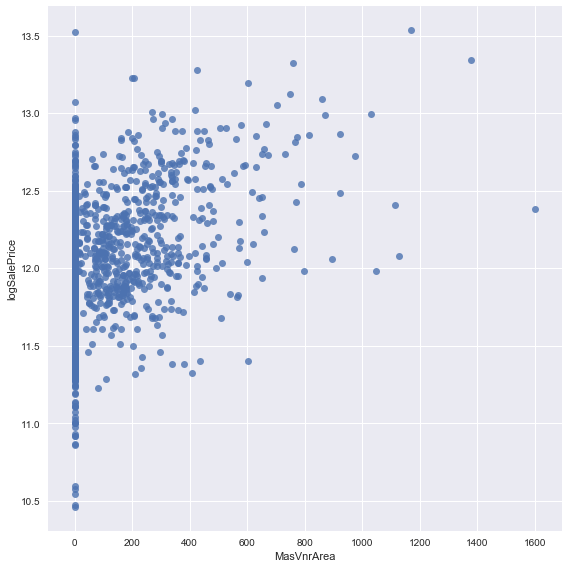

In [98]:
sns.lmplot("MasVnrArea", "logSalePrice",data=train,fit_reg=False,palette="Set1",size=8) # 

# does not have that much correlation with logSalePrice: but what about the others?

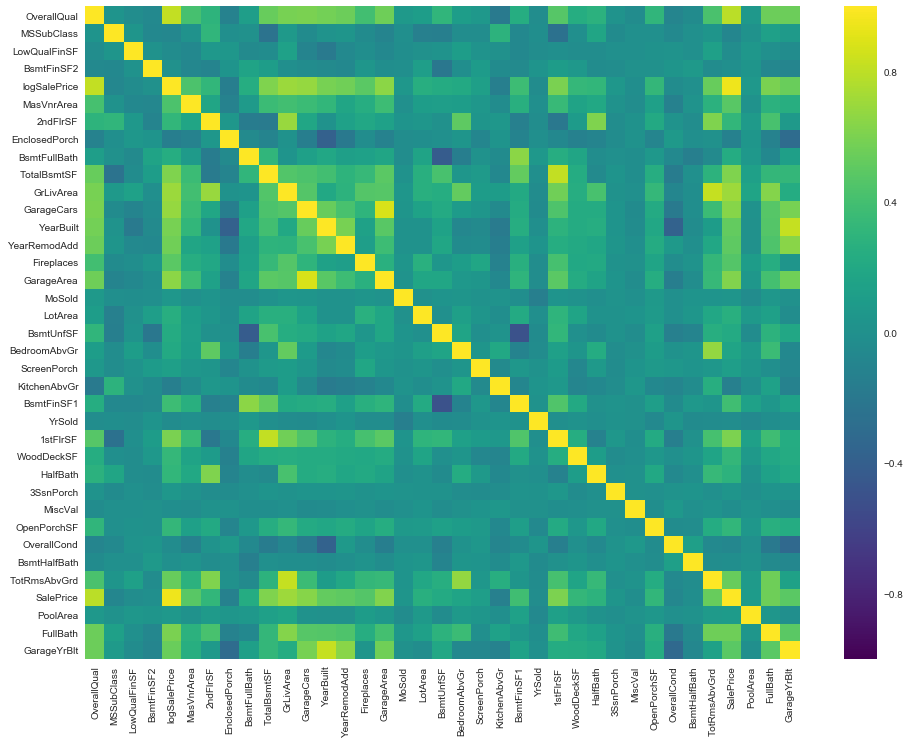

In [102]:
plt.figure(figsize=(16,12))
sns.heatmap(train[numerical_feats].corr(),cmap='viridis')

** Let's use a threshodl of 0.5 nad keep all  numerical features with corr cofiec > abs(0.5)** 

## Correlation is only with the training data 

In [105]:
corr = train[numerical_feats].corr().applymap(lambda x : abs(x))

In [127]:
numerical_feats_to_keep = list(set(corr[corr.logSalePrice > 0.5].drop('SalePrice',axis=1).index.tolist()) - set(['SalePrice']))

In [128]:
len(numerical_feats_to_keep), len(numerical_feats)

(12, 37)

# so from 37 --> 12 is good dimension reduction at this stage

In [129]:
numerical_feats_to_keep

['OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'YearRemodAdd',
 'GarageArea',
 'logSalePrice',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'FullBath',
 'GarageYrBlt']

In [130]:
df_numerical_reduced = df_numerical[numerical_feats_to_keep]

In [131]:
df_numerical_reduced.isnull().sum()

OverallQual        0
TotalBsmtSF        1
GrLivArea          0
GarageCars         1
YearBuilt          0
YearRemodAdd       0
GarageArea         1
logSalePrice    1459
TotRmsAbvGrd       0
1stFlrSF           0
FullBath           0
GarageYrBlt      159
dtype: int64

# GarageYrBlt has high numer of missing valeus how about droping it

In [151]:
df_numerical_reduced = df_numerical_reduced.drop('GarageYrBlt',axis=1)

In [152]:
df_numerical_reduced.shape

(2919, 11)

In [153]:
df_numerical_reduced.describe()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,YearBuilt,YearRemodAdd,GarageArea,logSalePrice,TotRmsAbvGrd,1stFlrSF,FullBath
count,2919.000000,2918.000000,2919.000000,2918.000000,2919.000000,2919.000000,2918.000000,1460.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,1051.777587,1500.759849,1.766621,1971.312778,1984.264474,472.874572,12.024051,6.451524,1159.581706,1.568003
std,1.409947,440.766258,506.051045,0.761624,30.291442,20.894344,215.394815,0.399452,1.569379,392.362079,0.552969
min,1.000000,0.000000,334.000000,0.000000,1872.000000,1950.000000,0.000000,10.460242,2.000000,334.000000,0.000000
25%,5.000000,793.000000,1126.000000,1.000000,1953.500000,1965.000000,320.000000,11.775097,5.000000,876.000000,1.000000
50%,6.000000,989.500000,1444.000000,2.000000,1973.000000,1993.000000,480.000000,12.001505,6.000000,1082.000000,2.000000
75%,7.000000,1302.000000,1743.500000,2.000000,2001.000000,2004.000000,576.000000,12.273731,7.000000,1387.500000,2.000000
max,10.000000,6110.000000,5642.000000,5.000000,2010.000000,2010.000000,1488.000000,13.534473,15.000000,5095.000000,4.000000


## for the others lets use median imputting

In [154]:
df_numerical_reduced.isnull().sum()

OverallQual        0
TotalBsmtSF        1
GrLivArea          0
GarageCars         1
YearBuilt          0
YearRemodAdd       0
GarageArea         1
logSalePrice    1459
TotRmsAbvGrd       0
1stFlrSF           0
FullBath           0
dtype: int64

In [155]:
df_numerical_reduced.TotalBsmtSF.fillna(df_numerical_reduced.TotalBsmtSF.median(),inplace=True)
df_numerical_reduced.GarageCars.fillna(df_numerical_reduced.GarageCars.median(),inplace=True)
df_numerical_reduced.GarageArea.fillna(df_numerical_reduced.GarageArea.median(),inplace=True)

In [156]:
df_numerical_reduced.isnull().sum()

OverallQual        0
TotalBsmtSF        0
GrLivArea          0
GarageCars         0
YearBuilt          0
YearRemodAdd       0
GarageArea         0
logSalePrice    1459
TotRmsAbvGrd       0
1stFlrSF           0
FullBath           0
dtype: int64

In [160]:
numerical_feats_reduced = df_numerical_reduced.columns.tolist()
numerical_feats_reduced

['OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'YearRemodAdd',
 'GarageArea',
 'logSalePrice',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'FullBath']

In [161]:
# ORDERING to make the logSale the last column
numerical_feats_reduced = ['OverallQual',
                             'TotalBsmtSF',
                             'GrLivArea',
                             'GarageCars',
                             'YearBuilt',
                             'YearRemodAdd',
                             'GarageArea',
                             'TotRmsAbvGrd',
                             '1stFlrSF',
                             'FullBath',
                              'logSalePrice']

In [162]:
numerical_feats_reduced

['OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'YearRemodAdd',
 'GarageArea',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'FullBath',
 'logSalePrice']

In [163]:
df_numerical_reduced = df_numerical_reduced[numerical_feats_reduced]

In [164]:
df_nominal.isnull().sum().sum()

0

In [158]:
df_ordinal.isnull().sum().sum()

0

#     PERFECT!! SEEMS I HAVE A CLEAN DATA

In [165]:
all_clean_data = pd.concat([df_nominal, df_ordinal,df_numerical_reduced],axis=1)

In [166]:
all_clean_data.shape[1], df_nominal.shape[1] + df_ordinal.shape[1] + df_numerical_reduced.shape[1]

(190, 190)

In [168]:
all_clean_data.isnull().sum().sum() # EXACT that is the logSale part to be predicted = 1459

1459

In [169]:
all_clean_data.to_csv('ALL_DATA_CLEANED_WITH_REDICED_NUMERICAL_FEATURES.csv')

In [170]:
df_nominal.to_csv('ALL_NOMINAL_DATA.csv')

In [171]:
df_ordinal.to_csv('ALL_ORDINLA_DATA.csv')

In [172]:
df_numerical.to_csv('ALL_NUMERICAl_DATA.csv')
df_numerical_reduced.to_csv('NUMERICAL_REDUCED_DATA.csv')

In [ ]:
## Modling continues 

## Before Modeling lets split again into the train and test (the one to to be predicted)

In [173]:
import warnings
warnings.filterwarnings("ignore")

In [174]:
train_clean = all_clean_data.ix[train.index]

In [175]:
train_clean.shape

(1460, 190)

In [176]:
test_clean = all_clean_data.ix[test.index]

In [177]:
test_clean.shape

(1459, 190)

In [178]:
test_clean.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_UK,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_UK,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_UK,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_UK,GarageFinish_RFn,GarageFinish_UK,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_UK,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_UK,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_UK,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_UK,SaleType_WD,Street_Pave,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Utilities_NoSeWa,Utilities_UK,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,ExterCond,ExterQual,Fence,FireplaceQu,GarageCond,GarageQual,HeatingQC,KitchenQual,PoolQC,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,YearBuilt,YearRemodAdd,GarageArea,TotRmsAbvGrd,1stFlrSF,FullBath,logSalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,2.0,3.0,1.0,3.0,2.0,3,3,3.0,0.0,3.0,3.0,3,3.0,0.0,5,882.0,896,1.0,1961,1961,730.0,5,896,1,NaN
1462,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,

In [180]:
test_clean.drop('logSalePrice',axis=1,inplace= True)

In [181]:
## Cheacking again
train_clean.isnull().sum().sum(), test_clean.isnull().sum().sum() ## sweet

(0, 0)

In [182]:
#Function  spliting data for trainig:

def which_data(df_train):    
    from sklearn.model_selection import train_test_split
    X = df_train.drop('logSalePrice',axis=1)
    y = df_train.logSalePrice
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=101)
    return X_train, X_test, y_train, y_test

In [183]:
def prediction(df_test):
    X_test = df_test.values
    return X_test

In [184]:
def cost_fun(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred)) 

# Models

In [189]:
from sklearn.metrics import mean_squared_error

In [190]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.12140422383850177

In [191]:
# now let's drop the outliers and their indexs are 
index_to_drop_later

[524, 1299]

In [194]:
X_train.drop(index_to_drop_later).shape, X_train.shape

((1312, 189), (1314, 189))

In [203]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
X_train, X_test, y_train, y_test = which_data(df_train = train_clean.drop(index_to_drop_later))
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.130864670280013

## XGBoos GridSearchCV

In [204]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [207]:
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators  =  [80, 100, 120, 140]
max_depth     = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators,learning_rate = learning_rate)

#param_grid = dict(learning_rate=learning_rate)

xg_model = XGBRegressor()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xg_model, param_grid, scoring= 'neg_mean_squared_error', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# xg_model = XGBRegressor()
# xg_model.fit(X_train, y_train)
# y_pred = xg_model.predict(X_test)
# cost_fun(y_pred,y_test)

Best: -0.018009 using {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 120}
-130.877944 (0.823399) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 80}
-130.356540 (0.821956) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}
-129.837216 (0.820515) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 120}
-129.319963 (0.819076) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 140}
-130.877944 (0.823399) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 80}
-130.356540 (0.821956) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 100}
-129.837216 (0.820515) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 120}
-129.319963 (0.819076) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 140}
-130.877944 (0.823399) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 80}
-130.356540 (0.821956) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 100}
-

In [208]:
# With the best parameters
from xgboost import XGBRegressor
xg_model = XGBRegressor(max_depth=6,n_estimators=120, learning_rate=0.1)
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.13369643227348393

In [253]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.12140422383850177

## Random Forest

In [212]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
rf  = RandomForestRegressor(n_estimators=101)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.13043109334626618

# ANN with keras

In [227]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD

In [229]:
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
ann = Sequential()
ann.add(Dense(units = 128, activation = "relu", input_dim = X_train.shape[1],kernel_initializer='normal'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 128, activation="relu",kernel_initializer='normal'))
ann.add(Dropout(0.5))
ann.add(Dense(units=1))
ann.compile(optimizer='adam',loss='mse')
ann.fit(X_train.values,y_train.values,epochs=1000,batch_size=20,verbose=0)
y_pred = ann.predict(X_test.values,verbose=0)
cost_fun(y_test,y_pred)

0.38972776387978231

In [218]:
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
ann = Sequential()
ann.add(Dense(units = 32, input_shape=(X_train.shape[1],)))
ann.add(Dense(activation="relu", units=16))
ann.add(Dense(activation="relu", units=8,))
ann.add(Dense(units=1))
ann.compile(Adam(lr=0.01),loss='mean_squared_error')
ann.fit(X_train.values,y_train.values,epochs=1000,batch_size=20,verbose=0)
y_pred = ann.predict(X_test.values,verbose=0)
cost_fun(y_test,y_pred)

0.38772553275541133

In [239]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

ann = Sequential()
ann.add(Dense(units = 32, input_shape=(X_train.shape[1],)))
ann.add(Dense(activation="relu", units=16))
ann.add(Dense(activation="relu", units=8,))
ann.add(Dense(units=1))
ann.compile(Adam(lr=0.05),loss='mean_squared_error')
ann.fit(X_train,y_train,epochs=1000,batch_size=20,verbose=0)
y_pred = ann.predict(X_test,verbose=0)
cost_fun(y_test,y_pred)

0.39070127259077225

## SVM Regressor

In [224]:
from sklearn import svm
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
svm_R= svm.SVR()
svm_R.fit(X_train,y_train)
y_pred = svm_R.predict(X_test)
cost_fun(y_test,y_pred)

0.37745890120576869

## DecisionTreeRegressor

In [231]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
cost_fun(y_test,y_pred)

0.18671198554394106

# Linear Regression

In [246]:
from sklearn.linear_model import  LinearRegression
X_train, X_test, y_train, y_test = which_data(df_train = train_clean.drop(index_to_drop_later))
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cost_fun(y_test,y_pred)

0.1257971944298531

# GradientBoostingRegressor

In [240]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train, X_test, y_train, y_test = which_data(df_train = train_clean.drop(index_to_drop_later))
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
cost_fun(y_test,y_pred)

0.12506645043423251

## AdaBoostRegressor

In [244]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train, X_test, y_train, y_test = which_data(df_train = train_clean.drop(index_to_drop_later))
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

gradient_boosting = AdaBoostRegressor()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
cost_fun(y_test,y_pred)

0.16760337485342011

## Submission File

In [254]:
def submission_file(model,df_test):
    submission = pd.DataFrame(df_test.index)
    X = df_test
    submission['logSalePrice'] = model.predict(X)
    submission['SalePrice']    = np.exp(submission['logSalePrice'])
    submission.drop('logSalePrice',axis=1).to_csv('Submission.csv',index=False)
    

In [256]:
submission_file(xg_model,test_clean)

In [258]:
train_clean.shape

(1460, 190)

In [260]:
# feature extraction
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = which_data(df_train = train_clean)
rfe = RFE(model, 10)
fit = rfe.fit(X_train, y_train)

In [274]:
result_rfe=pd.DataFrame(fit.ranking_,index= X_train.columns,columns =['val'])
result_rfe = result_rfe.sort_values('val',ascending=True)
# result_r['Rfe']=result_rfe['val']

In [290]:
cols_to_test = result_rfe[result_rfe['val'] <= 100].index.tolist()

In [285]:
len(cols_to_test)

24

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = which_data(df_train = train_clean[cols_to_test])
X_train, X_test, y_train, y_test = train_test_split(train_clean[cols_to_test], train_clean.logSalePrice, test_size=0.10,random_state=101)
rf  = RandomForestRegressor(n_estimators=101)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.13742836376955903

In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = which_data(df_train = train_clean[cols_to_test])
X_train, X_test, y_train, y_test = train_test_split(train_clean[cols_to_test], train_clean.logSalePrice, test_size=0.10,random_state=101)
xg_model = XGBRegressor()
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.12280650966079928

In [294]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=5e-4, max_iter=50000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test) 
cost_fun(y_pred,y_test)

0.12388079786175435

In [296]:
submission_file(model=lasso,df_test=test_clean[cols_to_test])